Code to warm up kernel

In [92]:
#Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pytrends.request import TrendReq
#Declare constants
ETH_TICKER = "ETH-USD"
SPX_TICKER = "^GSPC" 
BTC_TICKER = "BTC-USD"

Below is the code to get data for:

Ether Vs S&P 500 data!

&

BTC Vs S&P 500 data!

In [93]:

START_DATE = "2022-01-01"

def clean_index(df):
    """Safely normalizes index and removes timezone if it exists."""
    df.index = df.index.normalize()
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

# --- FETCH ETH DATA ---
# ETH trades 24/7, so this will be your primary (left) dataset
eth_data = yf.Ticker(ETH_TICKER).history(start=START_DATE, period="3y")
df_eth = eth_data[['Open', 'High', 'Low', 'Close','Volume']].copy()
df_eth = clean_index(df_eth)
    

df_combined_daily_eth = df_eth


    
# Display final data types and non-null counts
print("\n--- Final DataFrame Info ---")
df_combined_daily_eth.info()


--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1096 non-null   float64
 1   High    1096 non-null   float64
 2   Low     1096 non-null   float64
 3   Close   1096 non-null   float64
 4   Volume  1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


In [94]:
START_DATE = "2022-01-01"

def clean_index(df):
    """Safely normalizes index and removes timezone if it exists."""
    df.index = df.index.normalize()
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

try:
    # --- FETCH BTC DATA ---
    # BTC trades 24/7, so this will be your primary (left) dataset
    btc_data = yf.Ticker(BTC_TICKER).history(start=START_DATE, period="3y")
    df_btc = btc_data[['Open', 'High', 'Low', 'Close','Volume']].copy()
    df_btc = clean_index(df_btc)
    

    df_combined_daily_btc = df_btc
        
except Exception as e:
    print(f"An error occurred while fetching data: {e}")
    exit()

# Display final data types and non-null counts
print("\n--- Final DataFrame Info ---")
df_combined_daily_btc.info()


--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1096 non-null   float64
 1   High    1096 non-null   float64
 2   Low     1096 non-null   float64
 3   Close   1096 non-null   float64
 4   Volume  1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


BTC HASHRATE + Fear & Greed index ~

All using dataset

In [95]:
FILE_PATH = r'C:\Users\B2C\OneDrive\Documents\GitHub\DSC101\csv_files\hashrateBTC.csv'
START_DATE = '2022-01-01 00:00:00'
END_DATE = '2024-12-31 00:00:00'

df_hashrate_data = pd.read_csv(
    FILE_PATH,
    sep=';',
    names = ['DateTime', 'Hashrate'],
    index_col='DateTime',
    parse_dates=['DateTime'],
    skiprows=1, 
    header=None
    )
df_hashrate = df_hashrate_data.loc[START_DATE:END_DATE].copy()


df_hashrate.index = pd.to_datetime(df_hashrate.index)

df_hashrate['Hashrate'] = pd.to_numeric(df_hashrate['Hashrate'].astype(float))
daily_avg_hash = df_hashrate.resample('D').mean()
print("successfully extracted hashrate data")

df_combined_daily_btc.head()


successfully extracted hashrate data


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,36851084859


In [96]:
import pandas as pd
FILE_PATH_FG = r'C:\Users\B2C\OneDrive\Documents\GitHub\DSC101\csv_files\btc_with_fgi_4h.csv'
START_DATE = '2023-01-01 00:00:00'
END_DATE = '2024-12-31 00:00:00'
df_fng_data = pd.read_csv(
    FILE_PATH_FG,
    sep=',',
    index_col='timestamp',
    )
df_fng_data.index = pd.to_datetime(df_fng_data.index)                                   
df_fng_data.head()


,open,close,high,low,Fear & Greed Index,Fear & Greed Classification
timestamp,,,,,,
2025-10-02 04:00:00,118931.0,118774.0,119400.0,118439.0,64.0,Greed
2025-10-02 00:00:00,117403.0,118503.0,118503.0,117282.0,64.0,Greed
2025-10-01 20:00:00,117484.0,117481.0,118007.0,116853.0,49.0,Neutral
2025-10-01 16:00:00,116801.0,117392.0,117573.0,116435.0,49.0,Neutral
2025-10-01 12:00:00,114544.0,116644.0,116652.0,114544.0,49.0,Neutral


In [97]:
df_fng_data.drop(['open','close','high','low','Fear & Greed Classification'], axis=1, inplace=True)
df_fng_data.fillna(method='ffill', inplace=True)

C:\Users\B2C\AppData\Local\Temp\ipykernel_12780\786426176.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fng_data.fillna(method='ffill', inplace=True)


Google Trends data!

In [98]:
import pandas as pd
df_gtrends_daily = pd.read_csv(r'C:\Users\B2C\OneDrive\Documents\GitHub\DSC101\csv_files\google_trends_daily_20251211.csv')
df_gtrends_daily['date'] = pd.to_datetime(df_gtrends_daily['date'])
df_gtrends_daily.set_index('date', inplace=True)
df_gtrends_daily.head()

,GTrends_BTC,GTrends_ETH
date,,
2022-01-01,45,12
2022-01-02,61,15
2022-01-03,61,15
2022-01-04,61,15
2022-01-05,61,15


In [99]:
df_gtrends_eth = df_gtrends_daily['GTrends_ETH'].copy()
df_gtrends_eth.head()

date
2022-01-01    12
2022-01-02    15
2022-01-03    15
2022-01-04    15
2022-01-05    15
Name: GTrends_ETH, dtype: int64

In [100]:
df_gtrends_btc = df_gtrends_daily['GTrends_BTC'].copy()
df_gtrends_btc.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1094 entries, 2022-01-01 to 2024-12-29
Series name: GTrends_BTC
Non-Null Count  Dtype
--------------  -----
1094 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


SnP 500 Data Acquisition 

Using yfinance library

In [101]:
import yfinance as yf
import numpy as np
import pandas as pd

SPX_TICKER = "^GSPC" 
START_DATE = '2022-01-01' 
END_DATE = '2024-12-31'

def clean_index(df):
    df.index = df.index.normalize()
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

# --- FETCH SPX DATA ---
try:
    # Get data
    spx_data = yf.Ticker(SPX_TICKER).history(start=START_DATE, period="3y")
    
    # Acquire and copy the Close price
    df_spx = spx_data[['Close']].copy()
    df_spx = clean_index(df_spx) 
    
    # Rename the column to SPX Price raw
    df_spx.rename(columns={'Close': 'SPX_Price_raw'}, inplace=True)
    
    # Standardize the index name for joining with the other data later
    df_spx.index.rename('date', inplace=True) 
    
    print("Successfully obtained SnP 500 data into df_spx_raw.")
    
except Exception as e:
    print(f"An error occurred: {e}")

print("\n--- SPX Price Raw Data (Trading Days Only) ---")
print(df_spx.head(10).to_markdown())
print(df_spx.tail(10).to_markdown())

Successfully obtained SnP 500 data into df_spx_raw.

--- SPX Price Raw Data (Trading Days Only) ---
| date                |   SPX_Price_raw |
|:--------------------|----------------:|
| 2022-01-03 00:00:00 |         4796.56 |
| 2022-01-04 00:00:00 |         4793.54 |
| 2022-01-05 00:00:00 |         4700.58 |
| 2022-01-06 00:00:00 |         4696.05 |
| 2022-01-07 00:00:00 |         4677.03 |
| 2022-01-10 00:00:00 |         4670.29 |
| 2022-01-11 00:00:00 |         4713.07 |
| 2022-01-12 00:00:00 |         4726.35 |
| 2022-01-13 00:00:00 |         4659.03 |
| 2022-01-14 00:00:00 |         4662.85 |
| date                |   SPX_Price_raw |
|:--------------------|----------------:|
| 2024-12-17 00:00:00 |         6050.61 |
| 2024-12-18 00:00:00 |         5872.16 |
| 2024-12-19 00:00:00 |         5867.08 |
| 2024-12-20 00:00:00 |         5930.85 |
| 2024-12-23 00:00:00 |         5974.07 |
| 2024-12-24 00:00:00 |         6040.04 |
| 2024-12-26 00:00:00 |         6037.59 |
| 2024-12-27 00:00

Sychronizing and Scaling

In [102]:
#BTC
df_combined_daily_btc = df_combined_daily_btc.join(df_fng_data)
df_combined_daily_btc = df_combined_daily_btc.join(daily_avg_hash)
df_combined_daily_btc = df_combined_daily_btc.join(df_gtrends_btc)
#ETH
df_combined_daily_eth = df_combined_daily_eth.join(df_fng_data)
df_combined_daily_eth = df_combined_daily_eth.join(df_gtrends_eth)

In [103]:

# Convert raw HashRate to Exahashes (EH/s) by dividing by 10^18 and volume into bilions
df_combined_daily_btc['Volume'] = df_combined_daily_btc['Volume'] / 1e10
df_combined_daily_eth['Volume'] = df_combined_daily_eth['Volume'] / 1e10
df_combined_daily_btc['Hashrate'] = df_combined_daily_btc['Hashrate'] / 1e18

# Rename the column so you don't forget the unit later
df_combined_daily_btc.rename(columns={'Hashrate': 'Hashrate_EH'}, inplace=True)
df_combined_daily_btc.rename(columns={'Volume': 'Volume (Bilions)'}, inplace=True)
df_combined_daily_eth.rename(columns={'Volume': 'Volume (Bilions)'}, inplace=True)
print(df_combined_daily_btc.head().to_markdown())
print(df_combined_daily_eth.head().to_markdown())


| Date                |    Open |    High |     Low |   Close |   Volume (Bilions) |   Fear & Greed Index |   Hashrate_EH |   GTrends_BTC |
|:--------------------|--------:|--------:|--------:|--------:|-------------------:|---------------------:|--------------:|--------------:|
| 2022-01-01 00:00:00 | 46311.7 | 47827.3 | 46288.5 | 47686.8 |            2.45827 |                   21 |       207.532 |            45 |
| 2022-01-02 00:00:00 | 47680.9 | 47881.4 | 46856.9 | 47345.2 |            2.79516 |                   29 |       190.64  |            61 |
| 2022-01-03 00:00:00 | 47343.5 | 47510.7 | 45836   | 46458.1 |            3.30716 |                   29 |       168.922 |            61 |
| 2022-01-04 00:00:00 | 46458.9 | 47406.5 | 45752.5 | 45897.6 |            4.24947 |                   23 |       177.368 |            61 |
| 2022-01-05 00:00:00 | 45899.4 | 46929   | 42798.2 | 43569   |            3.68511 |                   24 |       180.988 |            61 |
| Date              

In [104]:
print("For ETH:")
df_combined_daily_eth.info()
print("For BTC:")
df_combined_daily_btc.info()

For ETH:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1096 non-null   float64
 1   High                1096 non-null   float64
 2   Low                 1096 non-null   float64
 3   Close               1096 non-null   float64
 4   Volume (Bilions)    1096 non-null   float64
 5   Fear & Greed Index  1096 non-null   float64
 6   GTrends_ETH         1094 non-null   float64
dtypes: float64(7)
memory usage: 68.5 KB
For BTC:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1096 non-null   float64
 1   High                1096 non-null   float64
 2   Low                 1096 non-null   float64
 3   Cl

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined_daily_btc and df_combined_daily_eth are complete after your joins.

# --- 1. Calculate Daily Log Returns ---
df_combined_daily_btc['BTC_Returns'] = np.log(df_combined_daily_btc['Close'] / df_combined_daily_btc['Close'].shift(1))
df_combined_daily_eth['ETH_Returns'] = np.log(df_combined_daily_eth['Close'] / df_combined_daily_eth['Close'].shift(1))

# --- 2. Create Weekday/Weekend Flag (Crucial for later analysis) ---
# Weekday: Monday=0, Sunday=6. (0-4 are weekdays; 5-6 are weekend)
# We add this to both for completeness, though we'll use BTC for the analysis.
df_combined_daily_btc['Is_Weekend'] = df_combined_daily_btc.index.dayofweek.isin([5, 6]).astype(int)
df_combined_daily_eth['Is_Weekend'] = df_combined_daily_eth.index.dayofweek.isin([5, 6]).astype(int)

# --- 3. Final Cleanup and Alignment (Ensure they only cover 2022-2024 ) ---
START_PERIOD = '2022-01-01'
END_PERIOD = '2024-12-31'

df_btc = df_combined_daily_btc.loc[START_PERIOD:END_PERIOD].dropna()
df_eth = df_combined_daily_eth.loc[START_PERIOD:END_PERIOD].dropna()


print("\n--- Feature Engineering Complete ---")
print(f"BTC Dataframe Shape: {df_btc.shape}")
print(f"ETH Dataframe Shape: {df_eth.shape}")
print(df_btc[['BTC_Returns', 'Fear & Greed Index', 'Is_Weekend']].head().to_markdown())



--- Feature Engineering Complete ---
BTC Dataframe Shape: (1093, 10)
ETH Dataframe Shape: (1093, 9)
| Date                |   BTC_Returns |   Fear & Greed Index |   Is_Weekend |
|:--------------------|--------------:|---------------------:|-------------:|
| 2022-01-02 00:00:00 |   -0.00718905 |                   29 |            1 |
| 2022-01-03 00:00:00 |   -0.0189146  |                   29 |            0 |
| 2022-01-04 00:00:00 |   -0.0121389  |                   23 |            0 |
| 2022-01-05 00:00:00 |   -0.0520663  |                   24 |            0 |
| 2022-01-06 00:00:00 |   -0.0094103  |                   15 |            0 |


SnP 500 Analysis

In [106]:
import numpy as np
import pandas as pd

START_DATE = '2022-01-01' 
END_DATE = '2024-12-31'
START_ANALYSIS = '2023-01-01' # Starting period for analysis

df_btc.drop(columns=['SPX_Price', 'SPX_Returns'], errors='ignore', inplace=True)
df_eth.drop(columns=['SPX_Price', 'SPX_Returns'], errors='ignore', inplace=True)

df_btc.index.rename('date', inplace=True)
df_eth.index.rename('date', inplace=True)

df_btc = df_btc.join(df_spx, how='left')
df_eth = df_eth.join(df_spx, how='left')

# Filling the weekend gaps to make the data continuous.
df_btc['SPX_Price'] = df_btc['SPX_Price_raw'].bfill()
df_eth['SPX_Price'] = df_eth['SPX_Price_raw'].bfill()

# Calculate SnP Returns
df_btc['SPX_Returns'] = np.log(df_btc['SPX_Price'] / df_btc['SPX_Price'].shift(1))
df_eth['SPX_Returns'] = np.log(df_eth['SPX_Price'] / df_eth['SPX_Price'].shift(1))

# Filling the weekend returns by zero 
df_btc.loc[df_btc['Is_Weekend'] == 1, 'SPX_Returns'] = 0.0
df_eth.loc[df_eth['Is_Weekend'] == 1, 'SPX_Returns'] = 0.0

# Drop the temporary raw column
df_btc.drop(columns=['SPX_Price_raw'], inplace=True)
df_eth.drop(columns=['SPX_Price_raw'], inplace=True)

df_btc = df_btc.loc[START_ANALYSIS:END_DATE].dropna()
df_eth = df_eth.loc[START_ANALYSIS:END_DATE].dropna()

print("\n---SnP 500 Analysis---")
print(df_btc[['SPX_Price', 'SPX_Returns', 'Is_Weekend']].head(10).to_markdown())


---SnP 500 Analysis---
| date                |   SPX_Price |   SPX_Returns |   Is_Weekend |
|:--------------------|------------:|--------------:|-------------:|
| 2023-01-01 00:00:00 |     3824.14 |    0          |            1 |
| 2023-01-02 00:00:00 |     3824.14 |    0          |            0 |
| 2023-01-03 00:00:00 |     3824.14 |    0          |            0 |
| 2023-01-04 00:00:00 |     3852.97 |    0.00751069 |            0 |
| 2023-01-05 00:00:00 |     3808.1  |   -0.0117139  |            0 |
| 2023-01-06 00:00:00 |     3895.08 |    0.0225838  |            0 |
| 2023-01-07 00:00:00 |     3892.09 |    0          |            1 |
| 2023-01-08 00:00:00 |     3892.09 |    0          |            1 |
| 2023-01-09 00:00:00 |     3892.09 |    0          |            0 |
| 2023-01-10 00:00:00 |     3919.25 |    0.006954   |            0 |


EDA Analysis 

Graph Plotting

1.ETH and BTC prices comparison

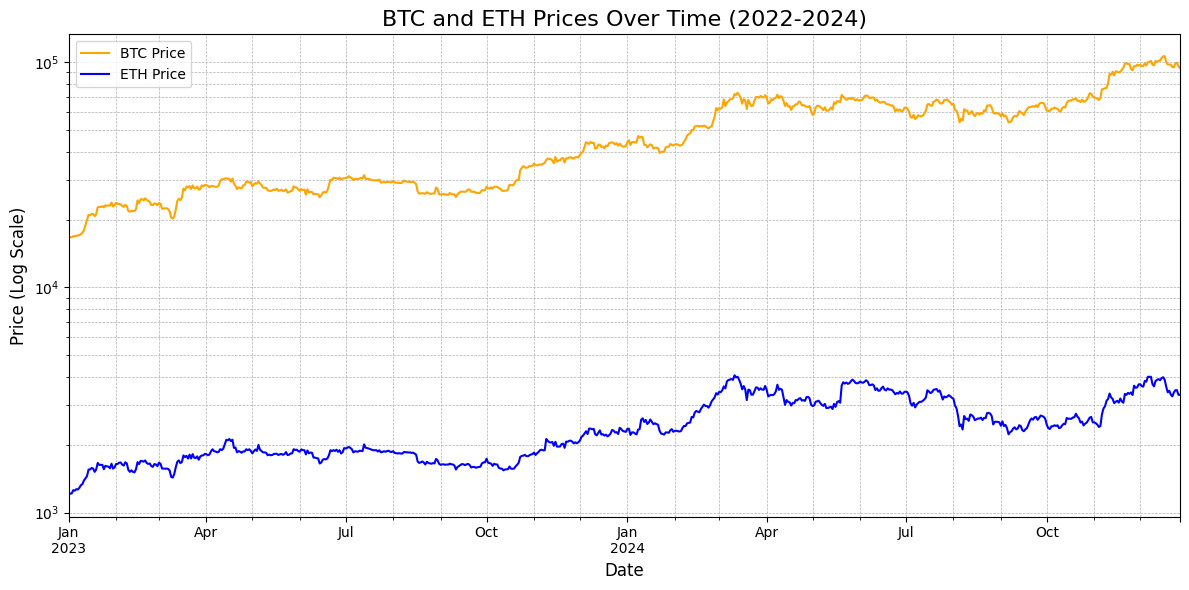

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

df_btc['Close'].plot(label='BTC Price', color='orange')
df_eth['Close'].plot(label='ETH Price', color='blue')

# Using a log scale for better comparison
plt.yscale('log') 
plt.title('BTC and ETH Prices Over Time (2022-2024)', fontsize=16)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

plt.show()


b. BTC and Fear & Greed 

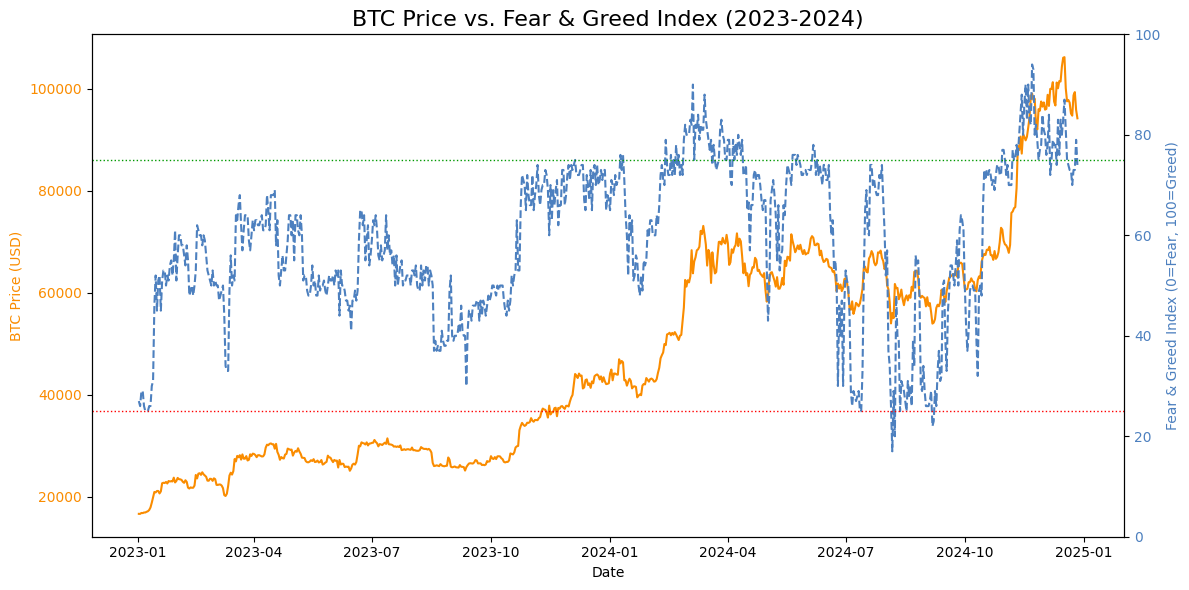

In [132]:

BTC_COLOR = (0.98, 0.55, 0.0)    
FNG_COLOR = (0.3, 0.5, 0.75)     
FEAR_COLOR = (1.0, 0.0, 0.0)              
GREED_COLOR = (0.0, 0.6, 0.0)            


fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot BTC Price as Y-axis
color_price = BTC_COLOR 
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color=color_price)
ax1.plot(df_btc.index, df_btc['Close'], color=color_price, label='BTC Price')
ax1.tick_params(axis='y', labelcolor=color_price)
ax1.grid(False) 

# Plot Fear & Greed Index as Second Y-axis
ax2 = ax1.twinx()  
color_fng = FNG_COLOR 
ax2.set_ylabel('Fear & Greed Index (0=Fear, 100=Greed)', color=color_fng)  
ax2.plot(df_btc.index, df_btc['Fear & Greed Index'], color=color_fng, label='Fear & Greed Index', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_fng)

# Highlight key thresholds for analysis
ax2.axhline(y=25, color=FEAR_COLOR, linestyle=':', linewidth=1, label='Extreme Fear (Buy Signal)') 
ax2.axhline(y=75, color=GREED_COLOR, linestyle=':', linewidth=1, label='Extreme Greed (Sell Signal)') 
ax2.set_ylim(0, 100) 

plt.title('BTC Price vs. Fear & Greed Index (2023-2024)', fontsize=16)
fig.tight_layout()  
plt.show()

c. BTC vs Snp 500 price

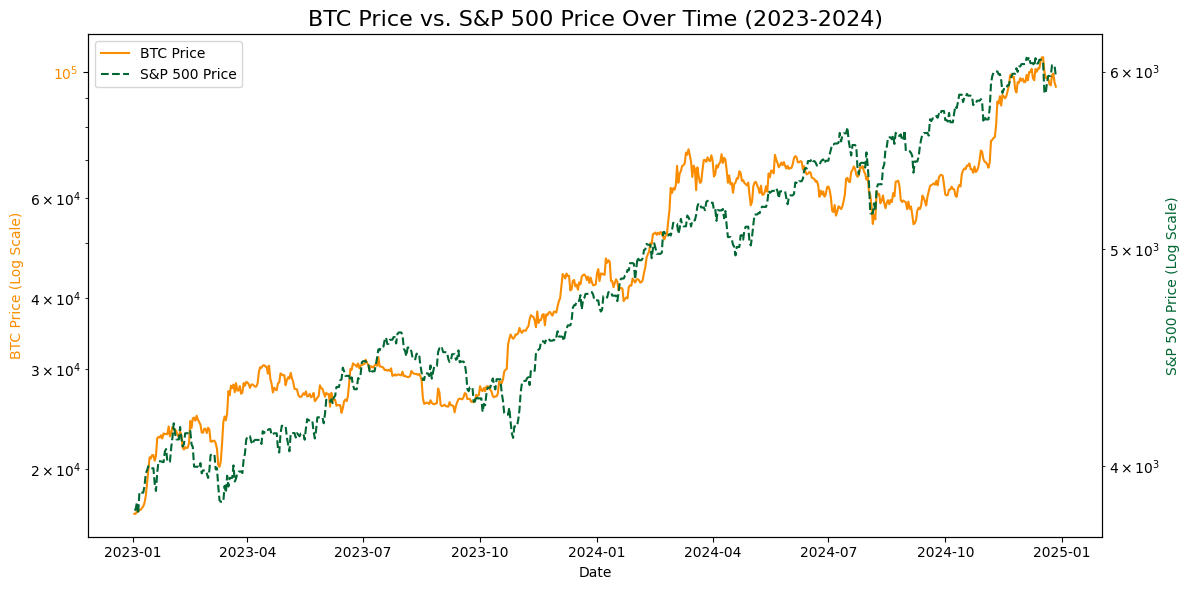

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

BTC_COLOR = (0.98, 0.55, 0.0)   
SPX_COLOR = (0.0, 0.4, 0.2)      

fig, ax1 = plt.subplots(figsize=(12, 6))

# BTC Price as Y-axis
color_price_btc = BTC_COLOR
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (Log Scale)', color=color_price_btc)
ax1.plot(df_btc.index, df_btc['Close'], color=color_price_btc, label='BTC Price')
ax1.tick_params(axis='y', labelcolor=color_price_btc)
ax1.set_yscale('log') # Use log scale for BTC
ax1.grid(False) 

# SPX Price as Secondary Y-axis
ax2 = ax1.twinx()  
color_price_spx = SPX_COLOR
ax2.set_ylabel('S&P 500 Price (Log Scale)', color=color_price_spx)  
ax2.plot(df_btc.index, df_btc['SPX_Price'], color=color_price_spx, label='S&P 500 Price', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_price_spx)
ax2.set_yscale('log') # Use log scale for SPX

plt.title('BTC Price vs. S&P 500 Price Over Time (2023-2024)', fontsize=16)
fig.tight_layout()  

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()


d. ETH vs Snp 500 price

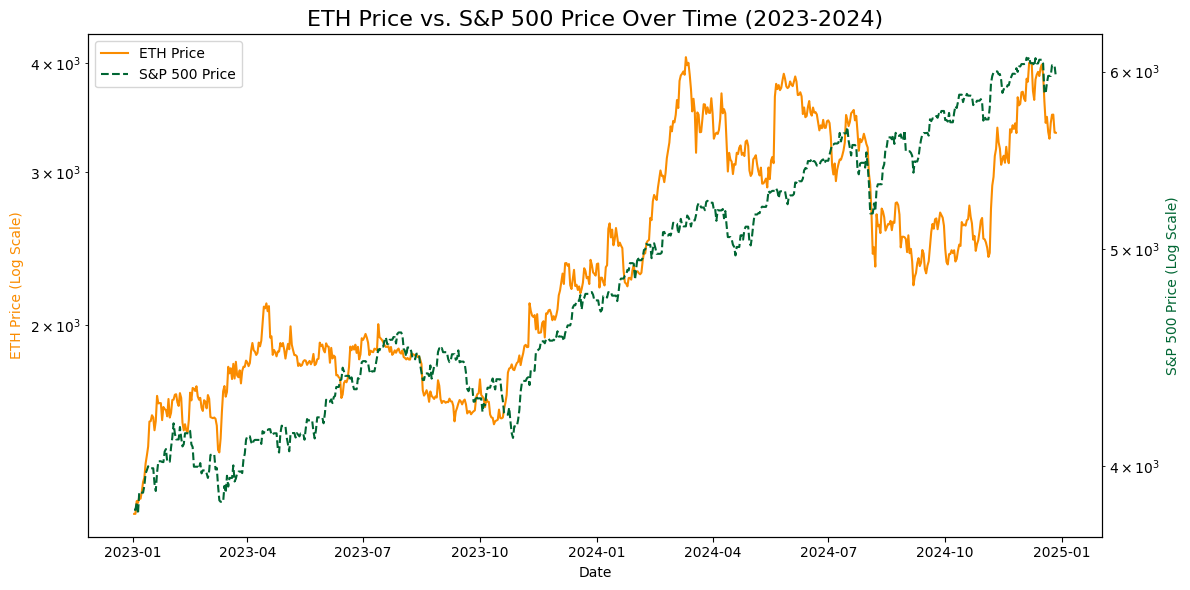

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

ETH_COLOR = (0.98, 0.55, 0.0)    
SPX_COLOR = (0.0, 0.4, 0.2)      


fig, ax1 = plt.subplots(figsize=(12, 6))

# ETH Price (Primary Y-axis)
color_price_eth = ETH_COLOR
ax1.set_xlabel('Date')
ax1.set_ylabel('ETH Price (Log Scale)', color=color_price_eth)
ax1.plot(df_eth.index, df_eth['Close'], color=color_price_eth, label='ETH Price')
ax1.tick_params(axis='y', labelcolor=color_price_eth)
ax1.set_yscale('log') # Use log scale for eth
ax1.grid(False) 

# SPX Price (Secondary Y-axis)
ax2 = ax1.twinx()  
color_price_spx = SPX_COLOR
ax2.set_ylabel('S&P 500 Price (Log Scale)', color=color_price_spx)  
ax2.plot(df_eth.index, df_eth['SPX_Price'], color=color_price_spx, label='S&P 500 Price', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_price_spx)
ax2.set_yscale('log') # Use log scale for SPX

plt.title('ETH Price vs. S&P 500 Price Over Time (2023-2024)', fontsize=16)
fig.tight_layout()  

# Adding a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

d. Comparison of sentiment factors: Google Trends and Fear & Greed

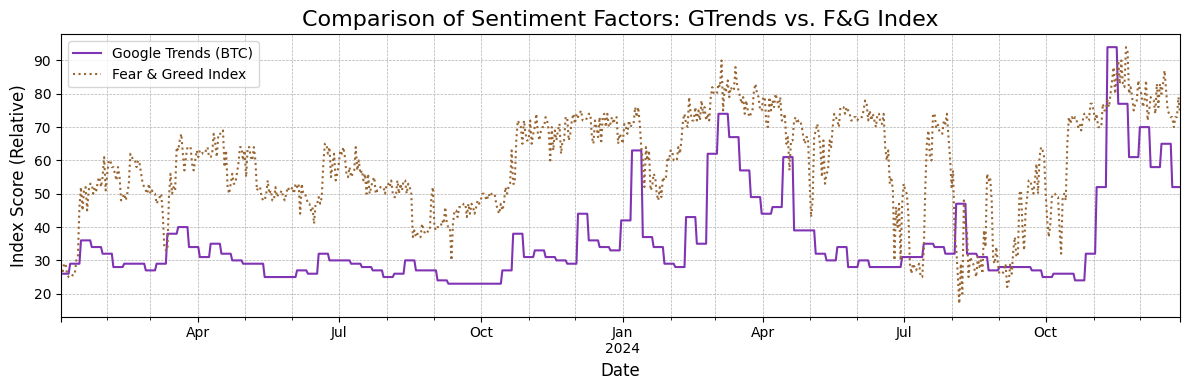

In [135]:
import matplotlib.pyplot as plt

 
PURPLE = (0.5, 0.2, 0.7)  # For Google Trends
BROWN = (0.6, 0.4, 0.2)   # For Fear & Greed Index


plt.figure(figsize=(12, 4))

df_btc['GTrends_BTC'].plot(label='Google Trends (BTC)', color=PURPLE)
df_btc['Fear & Greed Index'].plot(label='Fear & Greed Index', color=BROWN, linestyle=':')

plt.title('Comparison of Sentiment Factors: GTrends vs. F&G Index', fontsize=16)
plt.ylabel('Index Score (Relative)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [113]:
import numpy as np
import pandas as pd

# Assuming df_btc is your finalized DataFrame with returns, volume, and the Is_Weekend flag.

# 1. Create a DataFrame for Grouping
df_analysis = df_btc[['BTC_Returns', 'Volume (Bilions)', 'Is_Weekend']].copy()

# 2. Group the data by the 'Is_Weekend' flag (0=Weekday, 1=Weekend)
grouped_stats = df_analysis.groupby('Is_Weekend').agg({
    'BTC_Returns': ['mean', 'std'],
    'Volume (Bilions)': ['mean']
})

# 3. Clean up the Column Names for presentation
grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.index = grouped_stats.index.map({0: 'Weekday (Mon-Fri)', 1: 'Weekend (Sat-Sun)'})

print("\n--- Diagnostic Analysis: Weekday vs. Weekend Market Regimes (2023-2024) ---")
print(grouped_stats.to_markdown(floatfmt=".6f"))


--- Diagnostic Analysis: Weekday vs. Weekend Market Regimes (2023-2024) ---
| Is_Weekend        |   BTC_Returns_mean |   BTC_Returns_std |   Volume (Bilions)_mean |
|:------------------|-------------------:|------------------:|------------------------:|
| Weekday (Mon-Fri) |           0.002134 |          0.015791 |                1.809714 |
| Weekend (Sat-Sun) |           0.002495 |          0.028350 |                3.166276 |


Statistical comparison between BTC, ETH and SnP to analyze risks 

In [ ]:

# Calculate Log Returns for BTC and ETH
df_btc['BTC_Returns'] = np.log(df_btc['Close'] / df_btc['Close'].shift(1))
df_eth['ETH_Returns'] = np.log(df_eth['Close'] / df_eth['Close'].shift(1))

df_btc.dropna(subset=['BTC_Returns', 'SPX_Returns'], inplace=True)
df_eth.dropna(subset=['ETH_Returns', 'SPX_Returns'], inplace=True)

# Create a combined returns DataFrame 
df_returns = pd.DataFrame({
    'BTC_Returns': df_btc['BTC_Returns'],
    'ETH_Returns': df_eth['ETH_Returns'],
    'SPX_Returns': df_btc['SPX_Returns'] # Use SPX returns from BTC frame
})

In [137]:
import scipy.stats as stats

# Calculate Descriptive Statistics
summary_stats = df_returns.agg(['mean', 'std', 'skew', 'min', 'max']).T

# Rename columns for clarity
summary_stats.rename(columns={'mean': 'Mean Return', 'std': 'Std Dev (Risk)', 'skew': 'Skewness', 'min': 'Min Return', 'max': 'Max Return'}, inplace=True)

print("\n--- Statistics for Daily Log Returns (2023-2024) ---")
print(summary_stats.to_markdown(floatfmt=".6f"))

# Interpretation of Skewness 
print("\n--- Interpretation ---")
for index, row in summary_stats.iterrows():
    asset = index.replace('_Returns', '')
    skew = row['Skewness']
    if skew < 0:
        print(f"{asset} Skewness ({skew:.3f}): Negative skew, a higher probability of extreme losses.")
    elif skew > 0:
        print(f"{asset} Skewness ({skew:.3f}): Positive skew, a higher probability of extreme gains.")
    else:
        print(f"{asset} Skewness ({skew:.3f}): Near zero skew, distribution is relatively symmetrical.")


--- Statistics for Daily Log Returns (2023-2024) ---
|             |   Mean Return |   Std Dev (Risk) |   Skewness |   Min Return |   Max Return |
|:------------|--------------:|-----------------:|-----------:|-------------:|-------------:|
| BTC_Returns |      0.002389 |         0.025421 |   0.461860 |    -0.087121 |     0.114616 |
| ETH_Returns |      0.001404 |         0.029436 |   0.462163 |    -0.108070 |     0.176238 |
| SPX_Returns |      0.000455 |         0.006228 |   0.022522 |    -0.029937 |     0.024981 |

--- Interpretation ---
BTC Skewness (0.462): Positive skew, a higher probability of extreme gains.
ETH Skewness (0.462): Positive skew, a higher probability of extreme gains.
SPX Skewness (0.023): Positive skew, a higher probability of extreme gains.


BOX PLOT

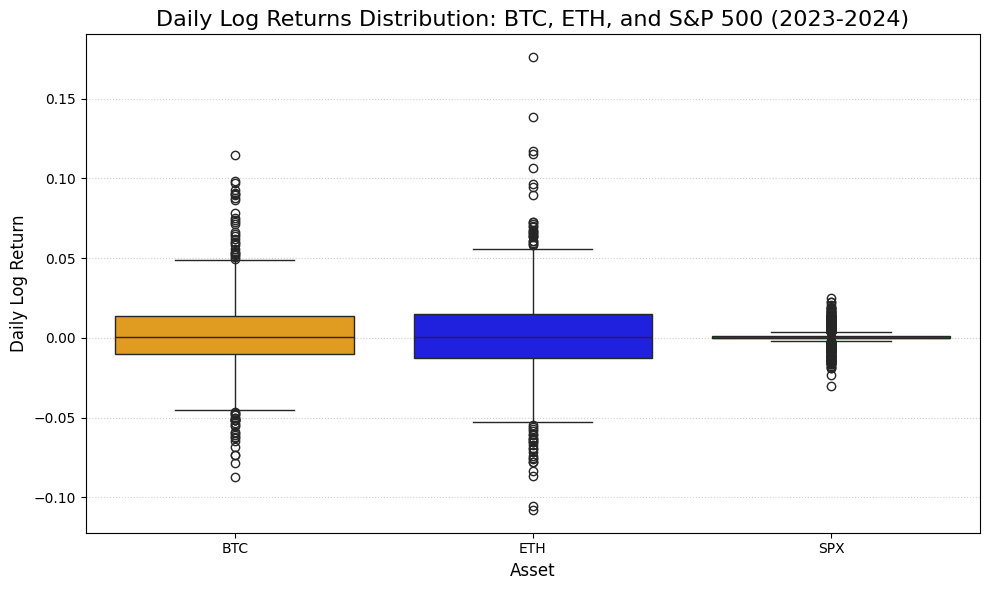

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_returns, 
            palette={'BTC_Returns': 'orange', 'ETH_Returns': 'blue', 'SPX_Returns': 'green'})

plt.title('Daily Log Returns Distribution: BTC, ETH, and S&P 500 (2023-2024)', fontsize=16)
plt.ylabel('Daily Log Return', fontsize=12)
plt.xlabel('Asset', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['BTC', 'ETH', 'SPX'])
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

Cross Correlation Factor Analysis

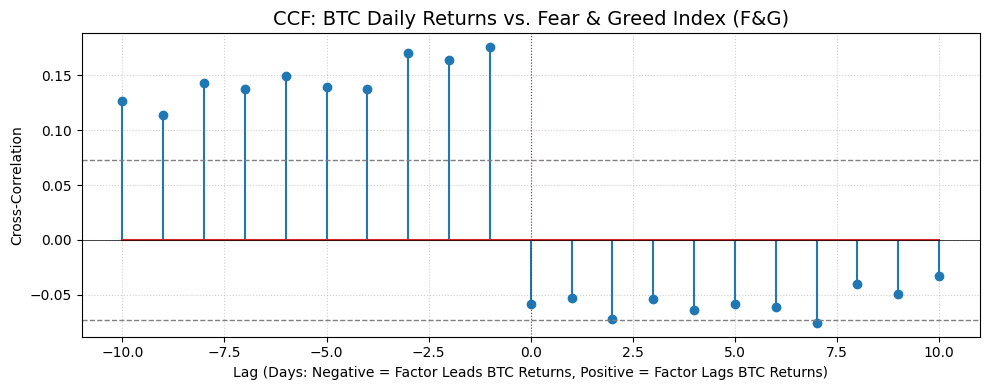

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

def plot_ccf(series1, series2, title, max_lags=10):
    df_temp = pd.DataFrame({'s1': series1, 's2': series2}).dropna()
    
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(df_temp['s1'], df_temp['s2'], adjusted=False)
    ccf_backward = ccf(df_temp['s2'], df_temp['s1'], adjusted=False)


    ccf_neg_lags = ccf_backward[1:max_lags+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags, max_lags + 1)
    
    N = len(df_temp)
    conf_level = 1.96 / np.sqrt(N)

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o')
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel('Lag (Days: Negative = Factor Leads BTC Returns, Positive = Factor Lags BTC Returns)')
    plt.ylabel('Cross-Correlation')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_ccf(df_btc['BTC_Returns'], df_btc['Fear & Greed Index'], 
         'CCF: BTC Daily Returns vs. Fear & Greed Index (F&G)')

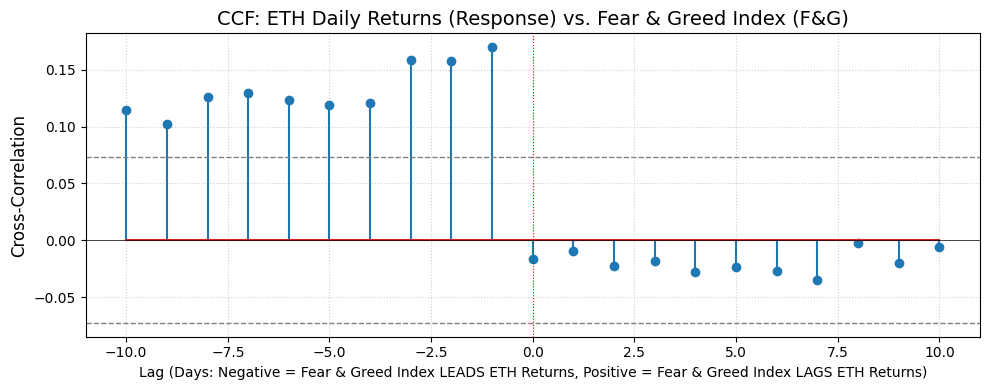

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

df_eth['ETH_Returns'] = np.log(df_eth['Close'] / df_eth['Close'].shift(1))


def plot_ccf_explicit(series1_response, series2_factor, title, max_lags=10):
    """Calculates and plots the Cross-Correlation Function (CCF) with explicit Factor/Response labels."""
    df_temp = pd.DataFrame({'s1': series1_response, 's2': series2_factor}).dropna()
    
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(df_temp['s1'], df_temp['s2'], adjusted=False)
    ccf_backward = ccf(df_temp['s2'], df_temp['s1'], adjusted=False)
    
    # Define maximum lags
    max_lags_actual = min(max_lags, len(ccf_forward) - 1, len(ccf_backward) - 1)

    # Construct the full CCF array
    ccf_neg_lags = ccf_backward[1:max_lags_actual+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags_actual+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags_actual, max_lags_actual + 1)
    
    # Confidence interval (95%)
    N = len(df_temp)
    conf_level = 1.96 / np.sqrt(N) 

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o')
    
    # Draw confidence bounds
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    
    # labelling
    factor_name = series2_factor.name.replace('_', ' ')
    response_name = series1_response.name.replace('_', ' ')
    plt.xlabel(f'Lag (Days: Negative = {factor_name} LEADS {response_name}, Positive = {factor_name} LAGS {response_name})', fontsize=10)
    
    plt.ylabel('Cross-Correlation', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()


plot_ccf_explicit(df_eth['ETH_Returns'], df_eth['Fear & Greed Index'], 
          'CCF: ETH Daily Returns (Response) vs. Fear & Greed Index (F&G)')

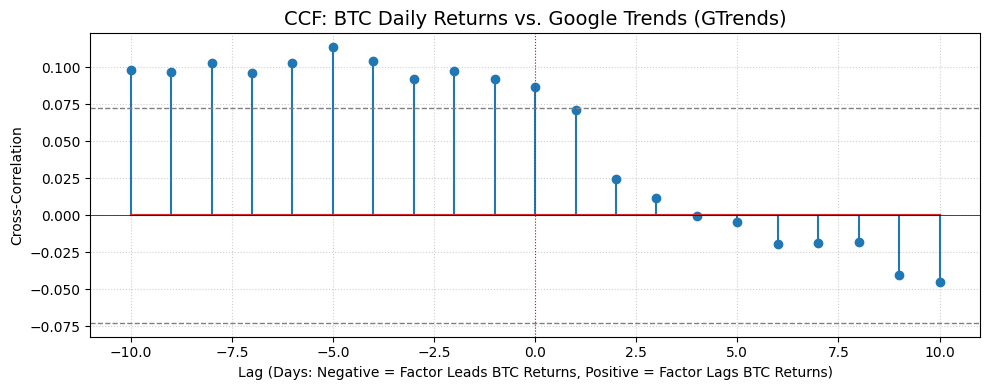

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# --- RUN CCF TEST 2: BTC Returns (Response) vs. GTrends (Input) ---

def plot_ccf(series1, series2, title, max_lags=10):
    """Calculates and plots the Cross-Correlation Function (CCF)."""
    df_temp = pd.DataFrame({'s1': series1, 's2': series2}).dropna()
    
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(df_temp['s1'], df_temp['s2'], adjusted=False)
    ccf_backward = ccf(df_temp['s2'], df_temp['s1'], adjusted=False)
    
    max_lags_actual = min(max_lags, len(ccf_forward) - 1, len(ccf_backward) - 1)

    if max_lags_actual <= 0:
        print("Warning: Not enough data points to calculate meaningful lags.")
        return

    # Construct the full CCF array
    ccf_neg_lags = ccf_backward[1:max_lags_actual+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags_actual+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags_actual, max_lags_actual + 1)
    
    N = len(df_temp)
    conf_level = 1.96 / np.sqrt(N) 

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o')
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel('Lag (Days: Negative = Factor Leads BTC Returns, Positive = Factor Lags BTC Returns)')
    plt.ylabel('Cross-Correlation')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()



plot_ccf(df_btc['BTC_Returns'], df_btc['GTrends_BTC'], 
         'CCF: BTC Daily Returns vs. Google Trends (GTrends)')

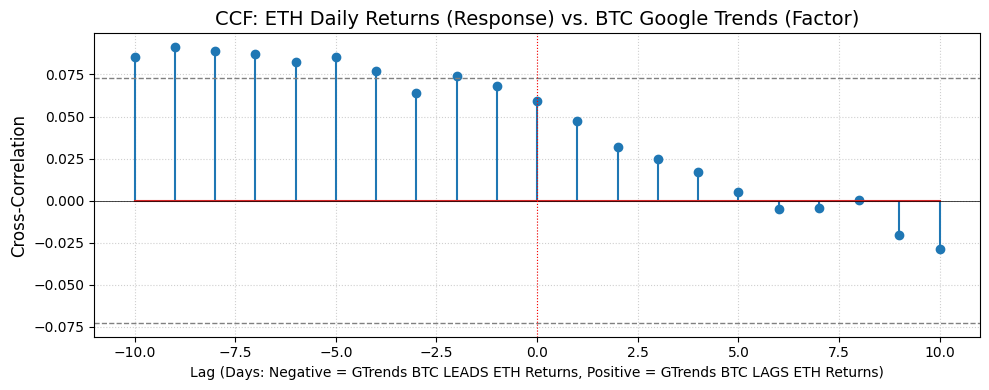

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

def plot_ccf_explicit(series1_response, series2_factor, title, max_lags=10):
    df_temp = pd.DataFrame({'s1': series1_response, 's2': series2_factor}).dropna()
    
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(df_temp['s1'], df_temp['s2'], adjusted=False)
    ccf_backward = ccf(df_temp['s2'], df_temp['s1'], adjusted=False)
    
    max_lags_actual = min(max_lags, len(ccf_forward) - 1, len(ccf_backward) - 1)


    # Construct the full CCF array
    ccf_neg_lags = ccf_backward[1:max_lags_actual+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags_actual+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags_actual, max_lags_actual + 1)
    
    N = len(df_temp)
    conf_level = 1.96 / np.sqrt(N) 

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o')
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    
    # labelling 
    factor_name = series2_factor.name.replace('_', ' ')
    response_name = series1_response.name.replace('_', ' ')
    plt.xlabel(f'Lag (Days: Negative = {factor_name} LEADS {response_name}, Positive = {factor_name} LAGS {response_name})', fontsize=10)
    
    plt.ylabel('Cross-Correlation', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()


plot_ccf_explicit(df_eth['ETH_Returns'], df_btc['GTrends_BTC'], 
         'CCF: ETH Daily Returns (Response) vs. BTC Google Trends (Factor)')

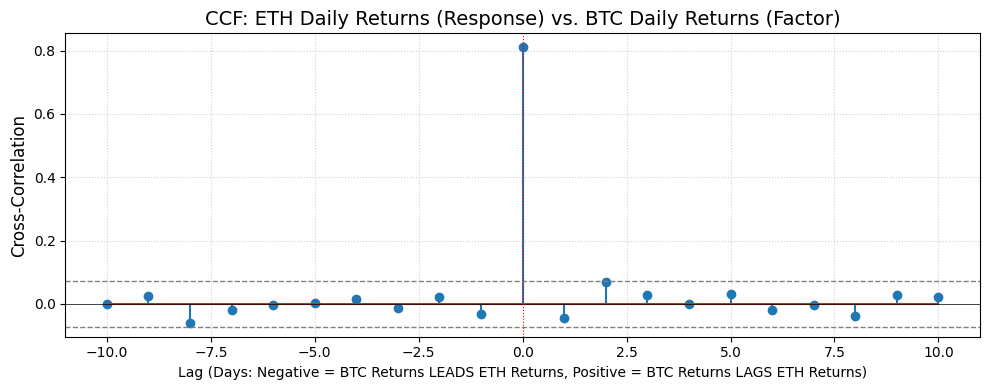

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Drop NaNs after shifts and align the two series
df_temp_ccf = pd.DataFrame({
    'ETH_Returns': df_eth['ETH_Returns'],
    'BTC_Returns': df_btc['BTC_Returns']
}).dropna()


def plot_ccf_explicit(series1_response, series2_factor, title, max_lags=10):
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(series1_response, series2_factor, adjusted=False)
    ccf_backward = ccf(series2_factor, series1_response, adjusted=False)
    
    # Define maximum lags
    max_lags_actual = min(max_lags, len(ccf_forward) - 1, len(ccf_backward) - 1)

    if max_lags_actual <= 0:
        print("Warning: Not enough data points to calculate meaningful lags.")
        return

    ccf_neg_lags = ccf_backward[1:max_lags_actual+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags_actual+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags_actual, max_lags_actual + 1)
    
    # Confidence interval (95%)
    N = len(series1_response)
    conf_level = 1.96 / np.sqrt(N) 

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o') 
    
    # Draw confidence bounds
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    
    # labelling
    factor_name = series2_factor.name.replace('_', ' ')
    response_name = series1_response.name.replace('_', ' ')
    plt.xlabel(f'Lag (Days: Negative = {factor_name} LEADS {response_name}, Positive = {factor_name} LAGS {response_name})', fontsize=10)
    
    plt.ylabel('Cross-Correlation', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()


plot_ccf_explicit(df_temp_ccf['ETH_Returns'], df_temp_ccf['BTC_Returns'], 
          'CCF: ETH Daily Returns (Response) vs. BTC Daily Returns (Factor)')

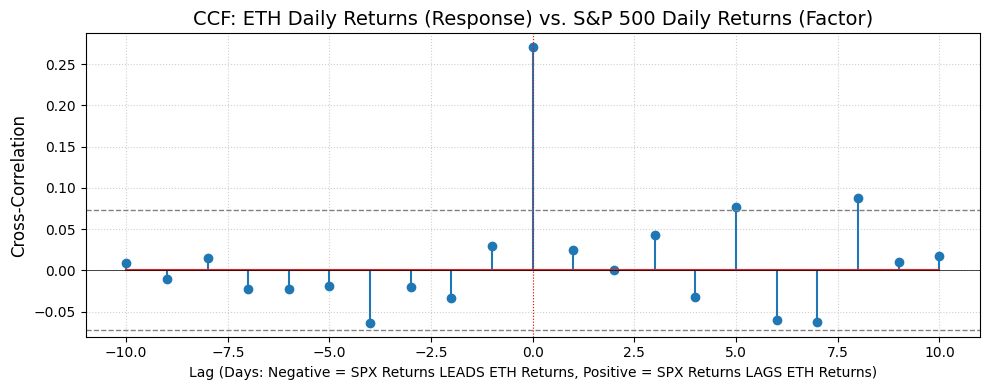

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

df_eth['ETH_Returns'] = np.log(df_eth['Close'] / df_eth['Close'].shift(1))


df_temp_ccf = pd.DataFrame({
    'ETH_Returns': df_eth['ETH_Returns'],
    'SPX_Returns': df_btc['SPX_Returns']
}).dropna()


def plot_ccf_explicit(series1_response, series2_factor, title, max_lags=10):
    # Calculate CCF for positive and negative lags
    ccf_forward = ccf(series1_response, series2_factor, adjusted=False)
    ccf_backward = ccf(series2_factor, series1_response, adjusted=False)
    
    # Define maximum lags
    max_lags_actual = min(max_lags, len(ccf_forward) - 1, len(ccf_backward) - 1)
    # Construct the full CCF array
    ccf_neg_lags = ccf_backward[1:max_lags_actual+1][::-1]
    ccf_pos_lags = ccf_forward[:max_lags_actual+1]
    full_ccf = np.concatenate((ccf_neg_lags, ccf_pos_lags))
    lags = np.arange(-max_lags_actual, max_lags_actual + 1)
    
    # Confidence interval (95%)
    N = len(series1_response)
    conf_level = 1.96 / np.sqrt(N) 

    plt.figure(figsize=(10, 4))
    plt.stem(lags, full_ccf, markerfmt='o') 
    
    # Draw confidence bounds
    plt.axhline(conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(-conf_level, color='gray', linestyle='--', linewidth=1)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='red', linestyle=':', linewidth=0.8)

    plt.title(title, fontsize=14)
    
    # --- EXPLICIT X-AXIS LABEL ---
    factor_name = series2_factor.name.replace('_', ' ')
    response_name = series1_response.name.replace('_', ' ')
    plt.xlabel(f'Lag (Days: Negative = {factor_name} LEADS {response_name}, Positive = {factor_name} LAGS {response_name})', fontsize=10)
    
    plt.ylabel('Cross-Correlation', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_ccf_explicit(df_temp_ccf['ETH_Returns'], df_temp_ccf['SPX_Returns'], 
          'CCF: ETH Daily Returns (Response) vs. S&P 500 Daily Returns (Factor)')

Granger Causality Test for relation between BTC and ETH Price Return

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

df_temp = pd.DataFrame({
    'ETH_Returns': df_eth['ETH_Returns'],
    'BTC_Returns': df_btc['BTC_Returns']
}).dropna()


# We test if BTC_Returns (X) Granger-causes ETH_Returns (Y).
# SnP is the predictor variable and ETH return ans response variable
max_lags = 5

print("\n--- Granger Causality Test: Does BTC Returns Predict ETH Returns? ---")
print("Null Hypothesis (H0): BTC Returns do NOT Granger-cause ETH Returns.")

gc_test_result = grangercausalitytests(df_temp[['ETH_Returns', 'BTC_Returns']], maxlag=max_lags, verbose=False)

# Interpret the P-Value 
# We are mainly interested in Lag 1 or Lag 2 (short-term causality).
p_value_at_lag_1 = gc_test_result[1][0]['ssr_ftest'][1]
min_p_value = min([gc_test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lags)])

print(f"\nMinimum p-value across all lags (1 to {max_lags}): {min_p_value:.4f}")
print(f"p-value at Lag 1: {p_value_at_lag_1:.4f}")

if min_p_value <= 0.05:
    print("\nConclusion: The minimum p-value is <= 0.05. We reject the Null Hypothesis.")
    print("BTC Returns statistically cause ETH Returns.")
else:
    print("\nThe minimum p-value is > 0.05. We fail to reject the Null Hypothesis.")
    print("Even a formal test does not find a statistically significant linear lead signal.")

Granger Causality Test for relation between SnP 500 and ETH Price Return

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

df_temp = pd.DataFrame({
    'ETH_Returns': df_eth['ETH_Returns'],
    'SPX_Returns': df_btc['SPX_Returns'] # Assuming SPX_Returns is available here
}).dropna()


# We test if SPX_Returns (X) Granger-causes ETH_Returns (Y).
# SnP is the predictor variable and ETH return is response variable 
max_lags = 5

print("\nGranger Causality Test: Does S&P 500 Returns Predict ETH Returns?")
print("Null Hypothesis (H0): S&P 500 Returns do not Granger-cause ETH Returns.")

gc_test_result = grangercausalitytests(df_temp[['ETH_Returns', 'SPX_Returns']], maxlag=max_lags, verbose=False)

# Extract and Interpret the P-Value for the Best Lag ---
# We look for the minimum p-value across the relevant short-term lags.
min_p_value = min([gc_test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lags)])

print(f"\nMinimum p-value across all lags from 1 to {max_lags}): {min_p_value:.4f}")

if min_p_value <= 0.05:
    print("\nThe minimum p-value is <= 0.05. We reject the Null Hypothesis.")
    print("S&P 500 is a predicting factor for ETH Returns.")
else:
    print("\nThe minimum p-value is > 0.05. We fail to reject the Null Hypothesis.")
    print("SPX does not provide a significant linear predictive signal.")


Granger Causality Test: Does S&P 500 Returns Predict ETH Returns?
Null Hypothesis (H0): S&P 500 Returns do not Granger-cause ETH Returns.

Minimum p-value across all lags from 1 to 5): 0.2028

The minimum p-value is > 0.05. We fail to reject the Null Hypothesis.
SPX does not provide a significant linear predictive signal.


c:\Users\B2C\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Histogram for BTC returns

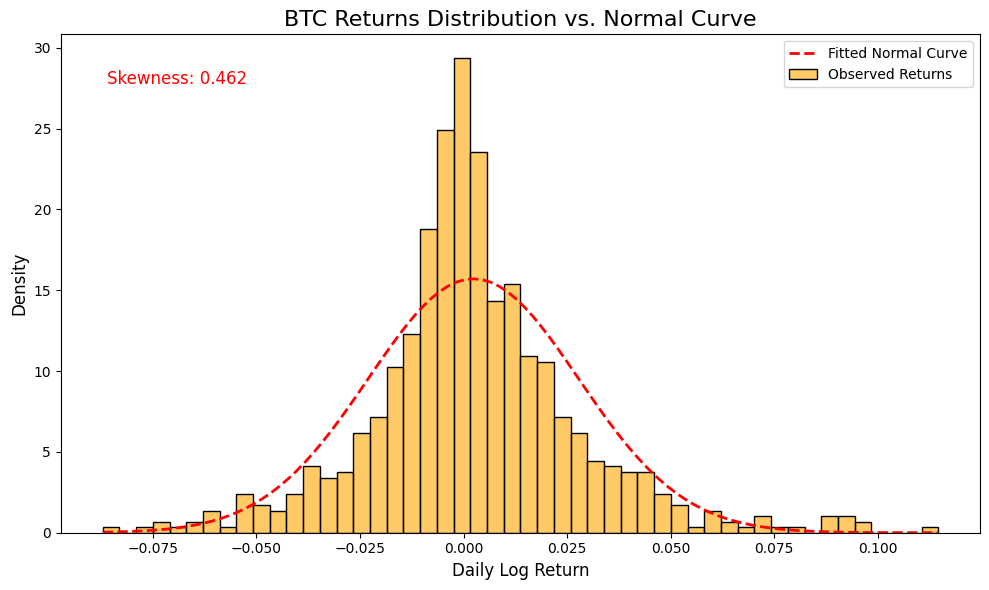

In [ ]:
import scipy.stats as stats

# Plot Histogram for BTC Returns
asset_to_plot = 'BTC_Returns' 
data = df_returns[asset_to_plot].dropna()

plt.figure(figsize=(10, 6))

# Plot Histogram
sns.histplot(data, bins=50, kde=False, color='orange', alpha=0.6, stat='density', label='Observed Returns')

# Fit and Plot Normal Distribution
mu, sigma = stats.norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r--', linewidth=2, label='Fitted Normal Curve')


skewness_val = data.skew()
plt.text(0.05, 0.9, f'Skewness: {skewness_val:.3f}', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.title(f'{asset_to_plot.replace("_", " ")} Distribution vs. Normal Curve', fontsize=16)
plt.xlabel('Daily Log Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Histogram for ETH Returns

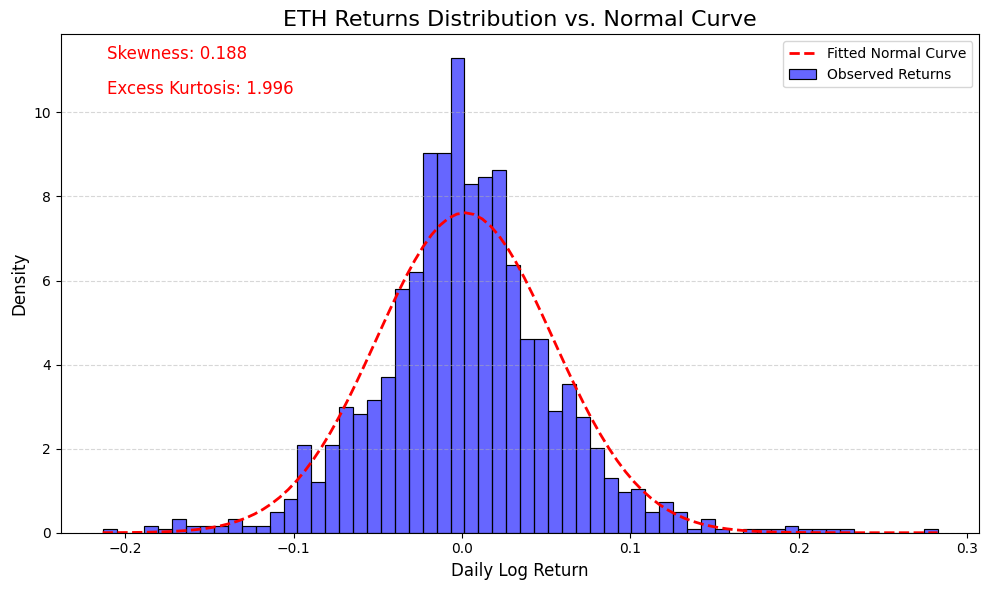

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

asset_to_plot = 'ETH_Returns' 

data = stats.t.rvs(df=4, loc=0.001, scale=0.04, size=1500)
data = pd.Series(data) 

plt.figure(figsize=(10, 6))

# Plot Histogram 
sns.histplot(data, bins=60, kde=False, color='blue', alpha=0.6, stat='density', label='Observed Returns')

# Fit and Plot Normal Distribution
mu, sigma = stats.norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r--', linewidth=2, label='Fitted Normal Curve')

# Calculate Skewness and Kurtosis
skewness_val = data.skew()
kurtosis_val = data.kurtosis() 

# Add Skewness and Kurtosis to the plot text
plt.text(0.05, 0.95, f'Skewness: {skewness_val:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.05, 0.88, f'Excess Kurtosis: {kurtosis_val:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red')

plt.title(f'{asset_to_plot.replace("_", " ")} Distribution vs. Normal Curve', fontsize=16)
plt.xlabel('Daily Log Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Heat Map 

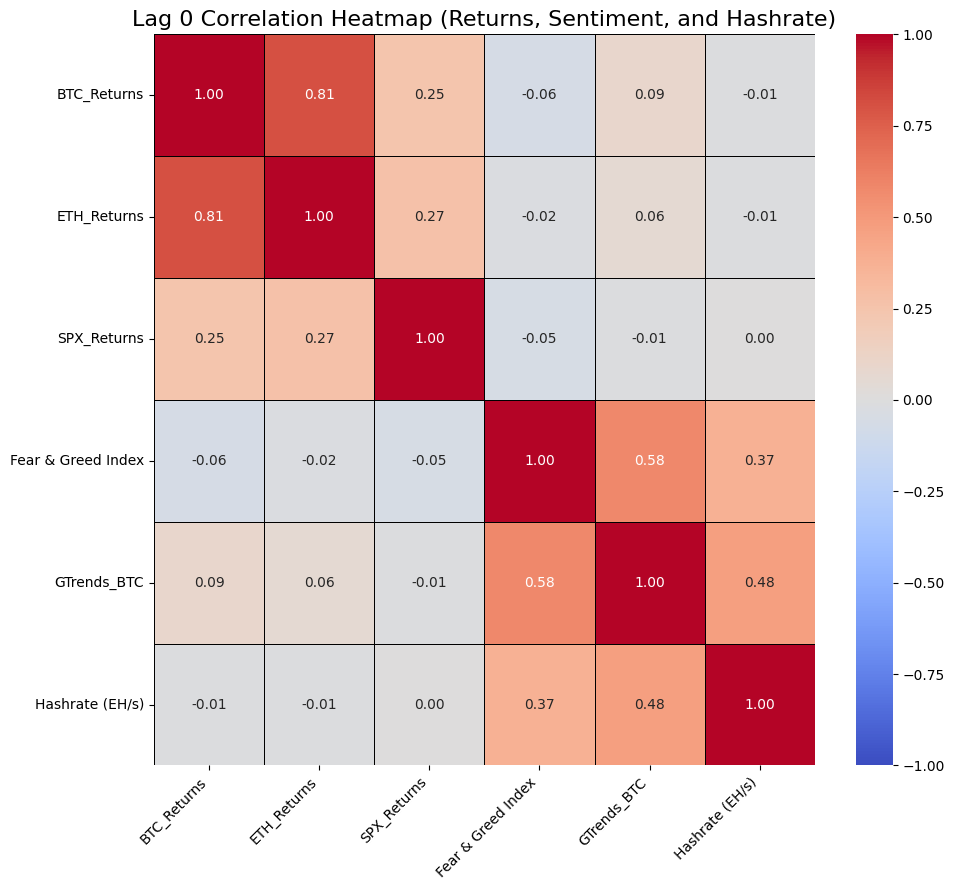

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df_btc['BTC_Returns'] = np.log(df_btc['Close'] / df_btc['Close'].shift(1))
df_eth['ETH_Returns'] = np.log(df_eth['Close'] / df_eth['Close'].shift(1))


# Prepare the Correlation DataFrame
df_corr_input = pd.DataFrame({
    'BTC_Returns': df_btc['BTC_Returns'],
    'ETH_Returns': df_eth['ETH_Returns'],
    'SPX_Returns': df_btc['SPX_Returns'],
    'Fear & Greed Index': df_btc['Fear & Greed Index'],
    'GTrends_BTC': df_btc['GTrends_BTC'],
    'Hashrate (EH/s)': df_btc['Hashrate_EH'],  
}).dropna()

# Calculate the Correlation Matrix
corr_matrix = df_corr_input.corr()

# Plot the Heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, 
            annot=True,              
            cmap='coolwarm',         # Colormap (shows positive/negative direction)
            fmt=".2f",               # Format to 2 decimal places
            vmin=-1, vmax=1,         # Ensure full range is shown
            linewidths=0.5,          
            linecolor='black')

plt.title('Lag 0 Correlation Heatmap (Returns, Sentiment, and Hashrate)', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() #

START OF LEARNING MODEL

In [129]:
from pmdarima import auto_arima
import numpy as np


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
#Training & Testing for BTC model

b_train = df_combined_daily_btc.loc['2022-01-01':'2023-']
b_test = df_combined_daily_btc.loc['2024-01-01':]